<a href="https://colab.research.google.com/github/nimash3eshan/Tea-Leaves-Diseases-Anlyze/blob/main/Tea_leaves_diseases_analyze_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GREEN TEA LEAVES DISEASE ANALYSER**
# WEB BASED DISEASE DETECTING AND SOLUTIONS PROVIDING SYSTEM

---

### Introduction
<p>web-based system for detecting and providing solutions for diseases in green tea leaves in Sri Lanka. The system will utilize cutting-edge computer technology such as image processing and machine learning methods to automate the process of disease detection, which is currently done manually. The goal of the system is to improve tea cultivation and production in Sri Lanka by providing farmers with early detection of diseases and helpful information for their management, thus improving the safety of the growing conditions and reducing the environmental impact of chemical use. The main objective of the application is to identify the diseases that occur in tea leaves before spreading them among tea cultivation, and also to suggest suitable treatments for the disease.</p>

## **1. Import Libraries**
<p>Before beginning we need to import suitable Libraries to our workspace 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  
import random
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Functional, clone_model
from keras.layers import Dropout, Dense, BatchNormalization, Input, concatenate, Flatten, Conv2D, MaxPool2D, Activation
from keras import regularizers, initializers, Model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import regularizers, initializers, Model

The imports several libraries that are commonly used for data analysis and machine learning tasks.

* pandas is a library for data manipulation and analysis. It provides data structures and functions for working with structured data, such as dataframes and series, which allow you to easily manipulate and analyze large sets of data.

* numpy is a library for mathematical computing in Python. It provides a wide range of mathematical functions and data structures, such as arrays and matrices, that are useful for numerical computations.

* seaborn is a data visualization library built on top of matplotlib. It provides a high-level interface for creating and customizing various types of plots, such as bar plots, scatter plots, and heatmaps, and is particularly useful for creating and visualizing statistical data.

* matplotlib is a library for creating 2D plots and graphs. It provides a wide range of plotting functions, including scatter plots, line plots, and histograms, and allows you to customize various aspects of the plots, such as axis labels, colors, and line styles.

* random is a built-in python library that provides various functions for generating random numbers and sequences.

* pathlib is a python library that provides an object-oriented way of working with file and directory paths. It makes it easy to create and manipulate file paths, and it is compatible with both Windows and Unix-based systems.

* sklearn (scikit-learn) is a machine learning library for Python. It provides a wide range of tools and techniques for tasks such as classification, regression, clustering, and model selection.

* tensorflow is a powerful open-source machine learning framework developed by Google. It allows you to easily build and train machine learning models, such as deep neural networks, and it provides a wide range of tools and libraries for tasks such as image processing, natural language processing, and time series analysis.

* keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow. It is designed to enable fast experimentation with deep neural networks, and it provides a simple and user-friendly interface for building and training complex models.

* ImageDataGenerator is a Keras class that can be used to generate batches of tensor image data with real-time data augmentation. It can be used to generate additional training data by applying random transformations to the images, such as rotations, shifts, and flips.

* Sequential is a linear stack of layers from keras that is used to create a simple feed-forward model.

Dropout, Dense, BatchNormalization, Input, concatenate, Flatten, Conv2D, MaxPool2D, and Activation are different types of layers that can be added to a neural network model in Keras.

* Dropout is a regularization technique that helps to prevent overfitting by randomly dropping out (i.e., setting to zero) a certain percentage of neurons during training.

* Dense is a fully connected layer, which means that each neuron in the layer is connected to all the neurons in the previous layer.

* BatchNormalization is a technique to normalize the activations of the previous layer at each batch, in order to stabilize and speed up the training process.

* Input is used as the first layer to instantiate a Keras model.

* concatenate is used to concatenate or join multiple layers or tensors together.

* Flatten is used to flatten the multi-dimensional tensors in a single dimension.

* Conv2D is used to create a convolutional layer, which is commonly used in image processing tasks to extract features from images.

* MaxPool2D is used to perform max pooling, which is a down-sampling technique that helps to reduce the spatial dimensions of the data and extract important features.

* Activation is used to apply an activation function, such as ReLU or sigmoid, to the output of a layer to introduce non-linearity in the model.





## **2. Load the DataSet**
Before doing further data analysis, this part describes the data processing procedure. Giving each column a new name and determining the data set's size are only a few examples of the data loading procedure.

For loading the dataset, we will use a Kaggle dataset, which has a large amount of sample data. This will make it easy to train our model more accurately, as we will have more data to learn from. 

The DataSet Link : [Tea leaves diseases data](https://www.kaggle.com/datasets/shashwatwork/identifying-disease-in-tea-leafs?resource=download)

But Dataset is huge (776MB) so we are going to install kaggle library and directly import the dataset

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir /content/kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle/kaggle.json /content/kaggle/kaggle.json

In [ ]:
!chmod 600 /content/kaggle/kaggle.json

In [ ]:
!KAGGLE_CONFIG_DIR=/content/kaggle/ kaggle datasets download -d shashwatwork/identifying-disease-in-tea-leafs

identifying-disease-in-tea-leafs.zip: Skipping, found more recently modified local copy (use --force to force download)


**The codes does the following:**

1. Mount the Google Drive at the /content/drive path.
2. Create a new directory called /content/kaggle
3. Copy the kaggle.json file from /content/drive/MyDrive/kaggle/kaggle.json to /content/kaggle/kaggle.json
4. Change the permissions of the kaggle.json file to 600, which means that the file owner has read and write permission, and no other user has any permission.
5. Download the dataset 'identifying-disease-in-tea-leafs' from kaggle using the downloaded kaggle.json file, and saving it to the /content/kaggle/ directory.


In [ ]:
!unzip ./identifying-disease-in-tea-leafs.zip

Archive:  ./identifying-disease-in-tea-leafs.zip
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143242.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143328.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143336.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143344.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143352.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143401.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143424.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143433.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143441.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143451.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143501.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143511.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143525.jpg  
  inflating: te

This will decompressed our data


## **3. Exploratory Data Analysis (EDA)**
In the Exploratory Data Analysis (EDA) part, we will be analyzing the tea leaf disease dataset that we have obtained. The main objective of this step is to gain a deeper understanding of the data and its characteristics. This step is crucial as it helps to identify patterns, trends, and outliers that may be present in the data. Additionally, EDA also helps to identify any missing or duplicate data, and to determine the quality of the data.

### Lets Define path or directory of the files

In [ ]:
dataset_path = '/content/tea sickness dataset/'
algal_leaf_path = '/content/tea sickness dataset/algal leaf'
anthracnose_path = '/content/tea sickness dataset/Anthracnose'
bird_eye_spot_path = '/content/tea sickness dataset/bird eye spot'
brown_blight_path = '/content/tea sickness dataset/brown blight'
gray_light_path = '/content/tea sickness dataset/gray light'
healthy_path = '/content/tea sickness dataset/healthy'
red_leaf_spot_path = '/content/tea sickness dataset/red leaf spot'
white_spot_path = '/content/tea sickness dataset/white spot'

dataset_path = pathlib.Path(dataset_path)
algal_leaf_path = pathlib.Path(algal_leaf_path)
anthracnose_path = pathlib.Path(anthracnose_path)
bird_eye_spot_path = pathlib.Path(bird_eye_spot_path)
brown_blight_path = pathlib.Path(brown_blight_path)
gray_light_path = pathlib.Path(gray_light_path)
healthy_path = pathlib.Path(healthy_path)
red_leaf_spot_path = pathlib.Path(red_leaf_spot_path)
white_spot_path = pathlib.Path(white_spot_path)

In this code snippet, the dataset_path variable is being set to the path of the root directory of the tea sickness dataset. Then, several other path variables are being set to the paths of different subdirectories within the root directory, specifically the subdirectories containing the images of leaves with different types of diseases. These subdirectories are named algal leaf, Anthracnose, bird eye spot, brown blight, gray light, healthy, red leaf spot, and white spot. The pathlib library is being used to create Path objects for each of these file paths, which allows for more robust and flexible file path handling. This code sets up the necessary file paths for working with the images within the dataset in the subsequent steps of the project.

### **Lets see how many images we have in the dataset**

In [ ]:
total_images = len(list(dataset_path.glob('*/*.jpg')))
algal_leaf_images = list(algal_leaf_path.glob('*.jpg'))
anthracnose_images = list(anthracnose_path.glob('*.jpg'))
bird_eye_spot_images = list(bird_eye_spot_path.glob('*.jpg'))
brown_blight_images = list(brown_blight_path.glob('*.jpg'))
gray_light_images = list(gray_light_path.glob('*.jpg'))
healthy_images = list(healthy_path.glob('*.jpg'))
red_leaf_spot_images = list(red_leaf_spot_path.glob('*.jpg'))
white_spot_images = list(white_spot_path.glob('*.jpg'))

tea_leaves = [algal_leaf_images, anthracnose_images, bird_eye_spot_images, brown_blight_images, gray_light_images, healthy_images, red_leaf_spot_images, white_spot_images]
tea_leaves_name = {0: 'algal leaf', 1: 'anthracnose', 2: 'bird eye spot', 3: 'brown blight', 4: 'gray light', 5: 'healthy leaf', 6: 'red leaf spot', 7: 'white spot'}

print('Total all images \t\t:', total_images)

for i, tea in enumerate(tea_leaves):
    length = len(tea)
    print('Total {} images \t: {}'.format(tea_leaves_name[i], length))

Total all images 		: 885
Total algal leaf images 	: 113
Total anthracnose images 	: 100
Total bird eye spot images 	: 100
Total brown blight images 	: 113
Total gray light images 	: 100
Total healthy leaf images 	: 74
Total red leaf spot images 	: 143
Total white spot images 	: 142


In this code snippet, the dataset_path variable is being set to the path of the root directory of the tea sickness dataset. Then, several other path variables are being set to the paths of different subdirectories within the root directory, specifically the subdirectories containing the images of leaves with different types of diseases. These subdirectories are named algal leaf, Anthracnose, bird eye spot, brown blight, gray light, healthy, red leaf spot, and white spot. The pathlib library is being used to create Path objects for each of these file paths, which allows for more robust and flexible file path handling. This code sets up the necessary file paths for working with the images within the dataset in the subsequent steps of the project.

### **Lets Visualize the image counts in a Table**

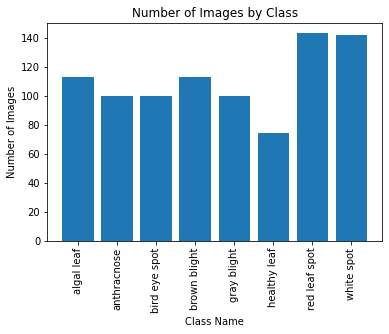

In [ ]:
classes_len = { 'algal leaf' : len(algal_leaf_images),
            'anthracnose': len(anthracnose_images),
            'bird eye spot': len(bird_eye_spot_images),
            'brown blight': len(brown_blight_images),
            'gray blight': len(gray_light_images), 
            'healthy leaf': len(healthy_images),  
            'red leaf spot': len(red_leaf_spot_images), 
            'white spot': len(white_spot_images)
          }
plt.bar(classes_len.keys(), classes_len.values());
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.xticks(rotation=90)
plt.ylabel('Number of Images');

This code is creating a bar chart that shows the number of images for each class of tea leaf disease. It does this by first creating a dictionary called classes_len where the keys are the names of the different types of diseases and the values are the number of images for each class.

Then it uses the plt.bar() function from the matplotlib library to create the bar chart. The first argument passed to this function is the names of the classes (i.e. the keys of the classes_len dictionary) and the second argument is the number of images for each class (i.e. the values of the classes_len dictionary).

The code then uses the plt.title(), plt.xlabel(), and plt.ylabel() functions to label the chart with a title, x-axis label, and y-axis label respectively. The plt.xticks(rotation=90) is used to rotate x-axis label 90 degree to make more legible.

The overall purpose of this code is to visualize the distribution of the images among different classes.

### **Lets visualize the first 5 images of each class**

Class :  algal leaf


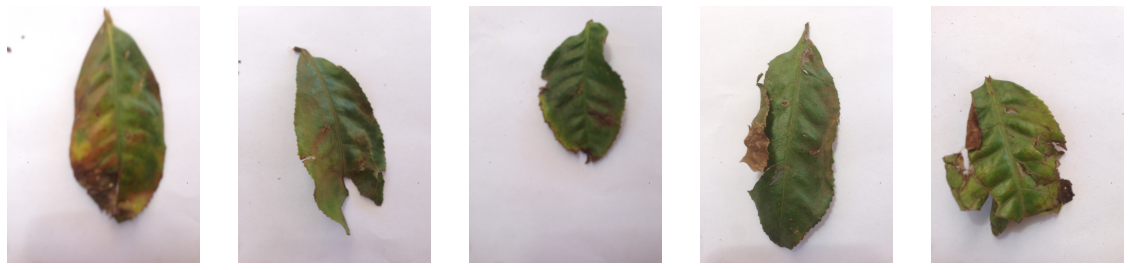

Class :  anthracnose


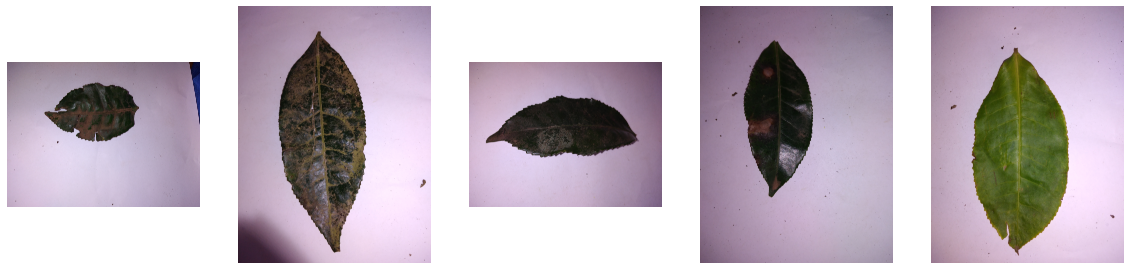

Class :  bird eye spot


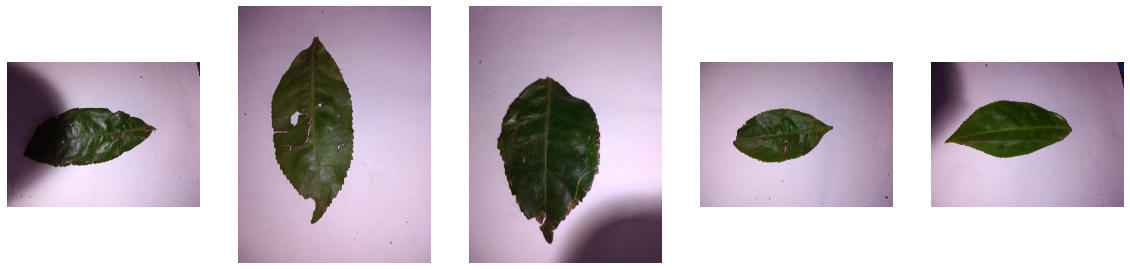

Class :  brown blight


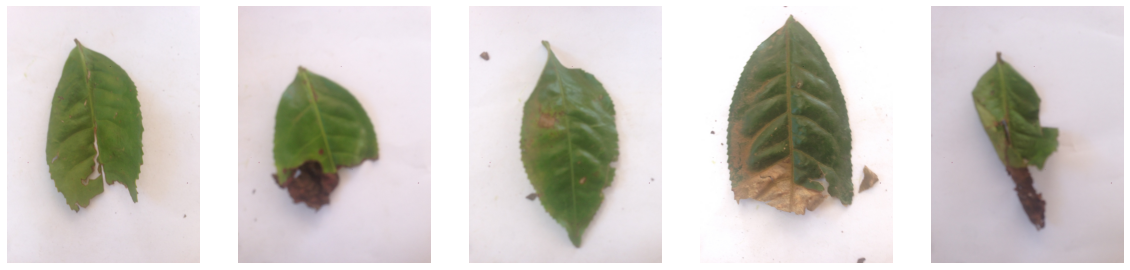

Class :  gray blight


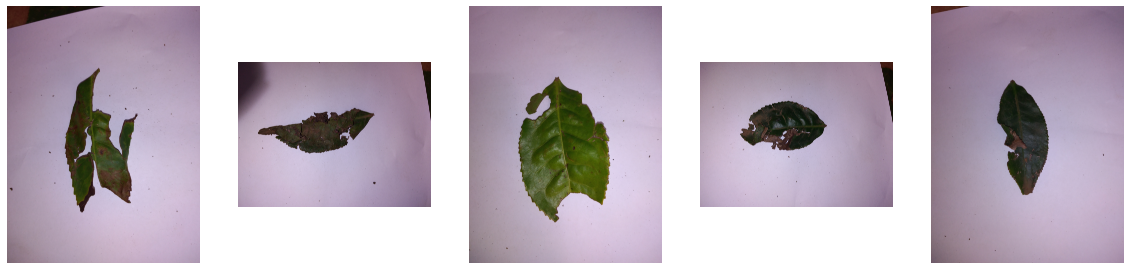

Class :  healthy leaf


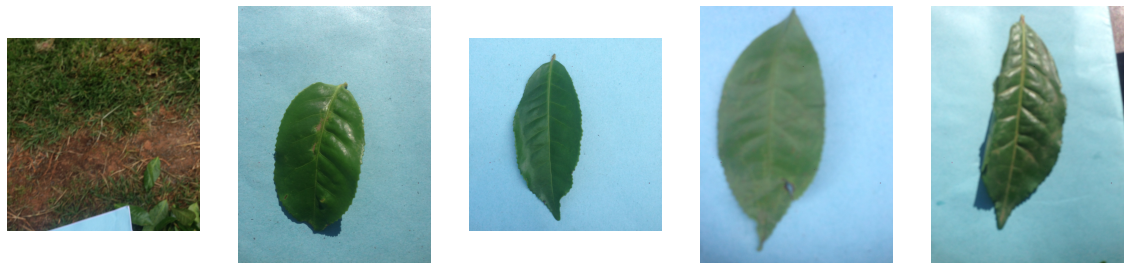

Class :  red leaf spot


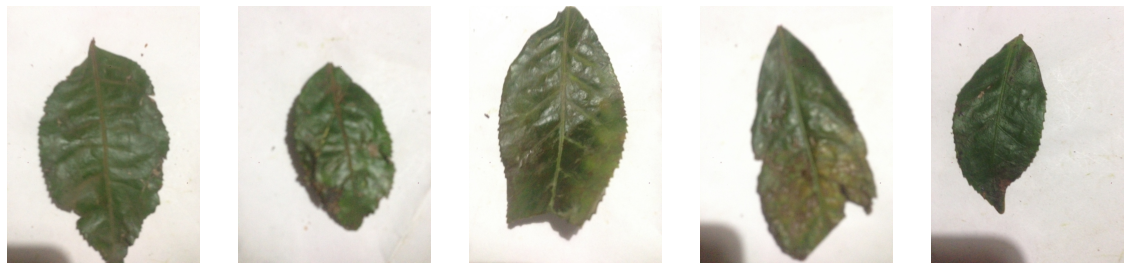

Class :  white spot


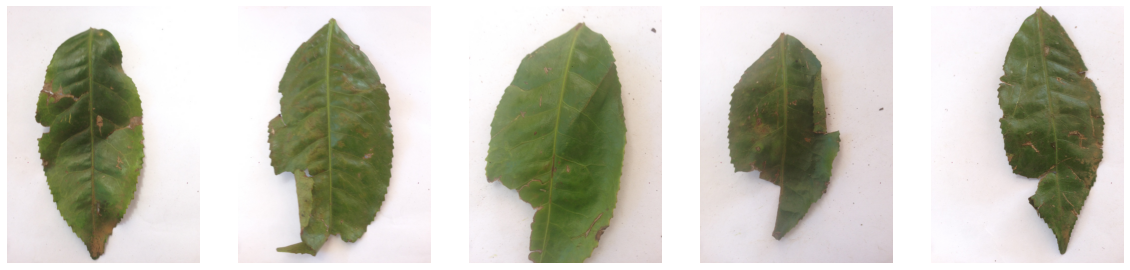

In [ ]:
classes = { 'algal leaf' : algal_leaf_images,
            'anthracnose': anthracnose_images,
            'bird eye spot': bird_eye_spot_images,
            'brown blight': brown_blight_images,
            'gray blight': gray_light_images, 
            'healthy leaf': healthy_images,  
            'red leaf spot': red_leaf_spot_images, 
            'white spot': white_spot_images
          }

for cls in classes.keys():
  folder_name = classes[cls]
  fig = plt.figure(figsize=(20, 20))
  columns = 5
  rows = 1
  print('Class : ', cls)
  for index in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, index)
      image = plt.imread(str(folder_name[index]))
      plt.imshow(image)
      plt.axis("off")
  plt.show()

This code first creates a dictionary called "classes" where the keys are the different class names (e.g. "algal leaf") and the values are lists of file paths to images in that class. Then, it iterates through each class name in the "classes" dictionary, and for each class, it creates a new figure with a grid of subplots. The number of rows and columns in this grid is determined by the "rows" and "columns" variables. For each subplot, the code reads the corresponding image file from the list of file paths, and displays it in the subplot. The title of the figure is the class name, and the function plt.axis("off") remove the axis from the image.

### **Lets Check dimension of each images**

In [ ]:
for cls in classes.keys():
  folder_name = classes[cls]
  print('Class : ', cls)
  for index in range(len(classes[cls])):
      image = plt.imread(str(folder_name[index]))
      h, w, c = image.shape
      print('height: {}, width: {}, Channel/Color Spectrum: {} - RGB if 3, Grayscale if 1'.format(h, w, c))

Class :  algal leaf
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channe

This code iterates through each class in the classes dictionary, and for each class, it retrieves the associated folder name which contains the images of that class. Then it iterates through each image in the folder and uses the imread function from the matplotlib library to read the image file, and store it in the variable image. Then it retrieves the height, width, and number of channels (c) of the image using the shape attribute. Finally, it prints the values of the height, width, and number of channels for each image, along with a message indicating what those values represent. This is useful for understanding the dimensions and properties of the images in the dataset, which can help inform decisions about how to preprocess and model the data.

All of the photos are RGB with three color channels, as can be seen from the dimensions stated for each class. Algal leaf has the same dimension as 1024 x 768, anthracnose primarily has the same dimension with different orientations (4160 x 3120 for portrait and 3120 x 4160 for landscape), bird eye spot primarily has the same dimension as 4160 x 3120 for portrait and 3120 x 4160 for landscape, brown blight primarily has the same dimension as 1024 x 768 for brown blight, healthy primarily has two dimensions (1024 x 768 & 10

## **4. Data Preprocessing**

In this next step of the project, we will be implementing the data preprocessing stage. This is an important step in any machine learning project, as it involves cleaning and preparing the data so that it is in a format that can be easily used for training and evaluating the model. This may involve tasks such as scaling and normalizing the data, removing outliers and missing values, and converting the data into a format that can be easily read by the model. By properly preprocessing the data, we can help ensure that the model is able to learn useful patterns and features from the data, and can help improve the overall performance and accuracy of the model.

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


split-folders is a python library that allows us to split a single dataset into train, validation and test sets using a simple and consistent interface. This library can be very useful when we want to create a train-test split for our deep learning model. It can also be used to create a validation set for our model, which can be used to evaluate the performance of our model during the training process. With this library, we can easily split our dataset into different subsets, without having to manually move or copy files around.

### Lets Split the Folders

In [ ]:
import splitfolders

splitfolders.ratio("tea sickness dataset", output="output",
    seed=25, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 885 files [00:02, 347.76 files/s]


This code is using the "splitfolders" library to split the images in the "tea sickness dataset" folder into three different folders, called "train", "val", and "test", with the ratio of 80% for training, 10% for validation, and 10% for testing. The "seed" parameter is used to set a random seed for reproducibility. "group_prefix" parameter is set to None, it means that it will not add prefix to the folder names, and "move" is set to "False", which means that it will not move the images but just copy them to the new folders. This is a common technique in machine learning to divide the dataset into training, validation, and testing sets, in order to have a better evaluation of the model performance.

### Lets Set Data Generator

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

The variables batch_size, img_height, and img_width are being used to set the batch size, the height and width of the images that will be used for training and testing the model. The batch size is the number of images that will be processed at a time during training. The height and width of the images will be resized to img_height and img_width respectively, so that all images have the same size before being fed into the model.

### Lets Create two type of preprocessing of images by rescaling only and augmented
Create two different types of picture preprocessing by rescaling alone and in combination, such as rescaling + rotation (20%) + zoom (20%) + horizontal flip, as images often still make sense whether we gently rotate, zoom, or flip them.

In [ ]:
tf.random.set_seed(25)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set directory data
train_dir = "output/train/"
val_dir = "output/val/"
test_dir = "output/test/"

# Set data generator
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=batch_size,
                                               target_size=(img_height, img_width),
                                               class_mode="categorical",
                                               seed=25)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=batch_size,
                                               target_size=(img_height, img_width),
                                               class_mode="categorical",
                                               seed=25)

valid_data = valid_datagen.flow_from_directory(val_dir,
                                               batch_size=batch_size,
                                               target_size=(img_height, img_width),
                                               class_mode="categorical",
                                               seed=25,
                                               shuffle=False)

test_data = valid_datagen.flow_from_directory( test_dir,
                                               batch_size=batch_size,
                                               target_size=(img_height, img_width),
                                               class_mode="categorical",
                                               seed=25,
                                               shuffle=False)

Found 706 images belonging to 8 classes.
Found 706 images belonging to 8 classes.
Found 87 images belonging to 8 classes.
Found 92 images belonging to 8 classes.


This code is used to set up data generators that will be used to read in the image data from the directories specified by the train_dir, val_dir, and test_dir variables. The data generators will be used to rescale the pixel values of the images by dividing each pixel value by 255 to bring them into the range of 0 to 1, which is a common preprocessing step for deep learning models. The train_data_augmented generator also applies data augmentation techniques such as rotation, zoom, and horizontal flip to the images in the training set to artificially increase the size of the dataset and reduce overfitting. The valid_data and test_data generators will be used to read in the validation and test sets respectively, and they set shuffle=False to ensure that the data is read in the order it appears in the directories.

## **5. Model Definition**
In the Model Definition part, we will define and create the architecture of our deep learning model. This will include selecting the appropriate layers, setting the number of neurons in each layer, and configuring the model's parameters. The goal of this step is to design a model that can effectively learn the patterns in the data and make accurate predictions. This is a crucial step in building a successful machine learning model, as the model's architecture plays a significant role in determining its performance.


Computer vision using a Convolutional Neural Network model that can recognize the categorization of sickness in tea leaves from a dataset is one of the objectives that should be accomplished in this scenario. There are two different types of convolutional neural networks, and they will be trained and assessed in the following ways:

1. CNN - Sequential API
2. CNN - Functional API

## **6. Model Training**
In this Section, we will be training our deep learning model using the dataset that we have prepared and preprocessed in the previous steps. This is an important step as it allows the model to learn from the data and make predictions on unseen data. We will be using a combination of techniques such as backpropagation, gradient descent, and other optimization algorithms to train the model. Additionally, we may also use techniques such as early stopping, learning rate scheduling, and regularization to further improve the performance of the model. Overall, the goal of this step is to fine-tune the model's parameters so that it can make accurate predictions on new data.


This contains only the code for training the cell model and the resulting output. Do the training process several times with different magnifications to see the results obtained. Analyze and describe these results in the Model Evaluation section.


### **- CNN - Sequential API**

The next step in building our tea leaf disease detection model is to define the model architecture using the Sequential API of Keras. This is a simpler way of defining a model where the layers are added one by one in a linear stack. We will be using a Convolutional Neural Network (CNN) architecture, which is commonly used for image classification tasks. This architecture will consist of several layers, including convolutional layers, pooling layers, and fully connected layers. The goal of this step is to define the structure of the model, and set up the layers and parameters that will be trained during the model training phase.

#### Lets build 1st Sequential API Model

In [ ]:
# Declare 1st Sequential API model
model_s1 = Sequential()

# convolutional + maxpooling
model_s1.add(Conv2D(16, 3, activation='relu', input_shape=(img_height, img_width, 3)))
model_s1.add(MaxPool2D(2))

model_s1.add(Conv2D(32, 3, activation='relu'))
model_s1.add(MaxPool2D(2))

model_s1.add(Conv2D(64, 3, activation='relu'))
model_s1.add(MaxPool2D(2))

# flattening
model_s1.add(Flatten())

# neural-networking
model_s1.add(Dense(32, activation='relu'))
model_s1.add(Dense(8, activation='softmax'))

This code block defines a Convolutional Neural Network (CNN) using the Sequential API of the Keras library. The model starts with three convolutional layers, each followed by a max pooling layer. These layers extract features from the input images by applying filters and down-sampling the image. The output of these layers is then flattened to a one-dimensional array, which is then passed through two fully-connected (dense) layers. The final layer has 8 neurons and a softmax activation function to output the probability of the image belongs to each class. This is a simple architecture for the model which can be improved based on the complexity of the problem and the data.

#### Lets compile the Model

Using optimizer "adam" refers to the best optimizer, loss function "categorical_crossentropy" since the expected output is the highest probability between classes ["Anthracnose," "algal leaf," "bird eye spot," "brown blight," "gray light," "healthy," "red leaf spot," and "white spot,"] and metrics "accuracy" for model learning monitoring.

In [ ]:
model_s1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

This code is compiling the model using the compile() method. The first argument passed to this method is the loss function, in this case 'categorical_crossentropy'. This loss function is used for multi-class classification problems, where the goal is to predict one of several possible classes. The second argument is the optimizer, in this case 'adam'. The Adam optimizer is an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments. The third argument is the metrics, in this case 'accuracy', it is used to measure the accuracy of the model during training and testing. This will allow us to track the performance of the model over time and make adjustments as needed.

For the training of the model, the input data used is "train_data" and for validation, the input data used is "valid_data". The model will be trained for 30 iterations, known as epochs, and will also utilize the "ReduceLROnPlateau" callback function during training.

In [ ]:
# Lets Train 1st Sequential API model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=0.0001)

# in here, earlystop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)
history_s1 = model_s1.fit(train_data, epochs=30, validation_data=valid_data, callbacks=[reduce_lr])
     

Epoch 1/30
23/23 [==============================] - 109s 5s/step - loss: 1.8750 - accuracy: 0.1926 - val_loss: 1.4307 - val_accuracy: 0.2759 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 93s 4s/step - loss: 1.3763 - accuracy: 0.3513 - val_loss: 1.3278 - val_accuracy: 0.4368 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 92s 4s/step - loss: 1.1933 - accuracy: 0.4660 - val_loss: 1.2378 - val_accuracy: 0.4368 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 88s 4s/step - loss: 1.0252 - accuracy: 0.5496 - val_loss: 1.1424 - val_accuracy: 0.4828 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 89s 4s/step - loss: 0.9422 - accuracy: 0.5935 - val_loss: 1.0653 - val_accuracy: 0.5287 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 90s 4s/step - loss: 0.8132 - accuracy: 0.6501 - val_loss: 1.0289 - val_accuracy: 0.5632 - lr: 0.0010
Epoch 7/30
23/23 [==============================] - 89s 4s/step - loss: 0.7709 - 

### **Load saved model**

In [ ]:
from tensorflow.keras.models import load_model
import pickle

# Load the model
model_s1 = load_model('model_s1.h5')

# Load the training history
with open('history_s3.pkl', 'rb') as f:
    history_s1 = pickle.load(f)

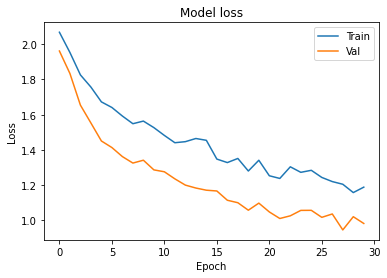

In [ ]:
# Plot loss & accuracy of 1st Sequential API model

plt.plot(history_s1['loss'])
plt.plot(history_s1['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

The following plot the loss of the model during training and validation process. The "plt.plot()" function is used to plot the loss of the model during training and validation process. The "plt.title()", "plt.ylabel()", "plt.xlabel()" and "plt.legend()" functions are used to add title, labels, and legend to the plot. The "plt.show()" function is used to display the plot.

This plot will be useful to see how the model is performing during the training process. If the training loss is decreasing and the validation loss is also decreasing, this means the model is learning and generalizing well. If the validation loss is increasing, it could mean that the model is overfitting to the training data, and you will have to take steps to address overfitting.

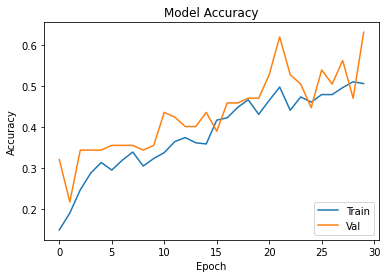

In [ ]:
plt.plot(history_s1.history['accuracy'])
plt.plot(history_s1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

This code is plotting the training and validation accuracy of the 1st Sequential API model over each epoch of training. The x-axis represents the number of epochs, and the y-axis represents the accuracy. The blue line represents the training accuracy and the orange line represents the validation accuracy. The 'Model Accuracy' is the title of the plot, and the legend on the lower right corner specifies which line represents the training and validation accuracy. The purpose of this plot is to visualize how well the model is performing on the training data and how well it is generalizing to new data (validation data) during the training process.

We can see that 1st CNN sequential API model indicates both loss and accuracy are divergent. Learning curve in train set its loss function significantly decreases into 0,01 meanwhile in valid set its loss function moves divergent to 1,60. The train set's accuracy indicates 0,99 which means too good to be true while the valid set's accuracy stucks in 0,66. It is a clear sign in which this model tends to overfitting.

### **save trained model**

In [ ]:
# save trained model_s1
model_s1.save('model_s1.h5')

In [ ]:
import pickle

# Save the training history
with open('history_s1.pkl', 'wb') as f:
    pickle.dump(history_s1.history, f)

This code is saving the trained model_s1 as a HDF5 file. HDF5 is a file format for storing large amounts of numerical data. It is designed to handle very large datasets that can be efficiently stored, compressed, and manipulated. By saving the model as a .h5 file, it can be easily loaded and used for future predictions or further training. The ".save" function in this line of code is from the Keras library, which is a high-level neural networks API that runs on top of TensorFlow.

### Build 2nd Sequential API Model
Building with 3 layers convolutional2D with different filters (16, 32, 64) with 3x3 & maxpool2D, then flattening prior fully-connected neural-networking with 1 hidden layers (with 32 neurons) then setting up dropout 0.3 which means that the neurons in the previous layer has a probability of 0.3 in dropping out during training. All activation function are using relu

In [ ]:
# Declare 2nd Sequential API model
model_s2 = Sequential()

# convolutional + maxpooling
model_s2.add(Conv2D(16, 3, activation='relu', input_shape=(img_height, img_width, 3)))
model_s2.add(MaxPool2D(2))

model_s2.add(Conv2D(32, 3, activation='relu'))
model_s2.add(MaxPool2D(2))

model_s2.add(Conv2D(64, 3, activation='relu'))
model_s2.add(MaxPool2D(2))

# flattening
model_s2.add(Flatten())

# neural-networking
model_s2.add(Dense(32, activation='relu'))
model_s2.add(Dropout(0.3))
model_s2.add(Dense(8, activation='softmax'))


 The input shape for the model is specified as (img_height, img_width, 3), which means the model expects images to have a height and width of img_height and img_width, and 3 color channels (RGB). The activation function used for the convolutional and dense layers is 'relu', which stands for rectified linear unit. Dropout layers are also added to the model which will help to prevent overfitting by randomly "turning off" a certain percentage of neurons during training. Finally, the last layer has 8 neurons with softmax activation which will give the probability of each class.

Using optimizer 'adam' refers to most favorable optimizer, loss function 'categorical_crossentropy' since expected output is the most highest probability between class ['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot'], and metrics 'accuracy' for monitoring in model learning

In [ ]:
# model-compiling
model_s2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Using input train_data_augmented for training and valid_data for validation, with 30 epochs for model learning, and ReduceLROnPlateau callbacks

In [ ]:
# Train 2nd Sequential API model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=0.0001)

# earlystop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)
history_s2 = model_s2.fit(train_data_augmented, epochs=30, validation_data=valid_data, callbacks=[reduce_lr])

Epoch 1/30
23/23 [==============================] - 99s 4s/step - loss: 2.0022 - accuracy: 0.2394 - val_loss: 1.6154 - val_accuracy: 0.3103 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 94s 4s/step - loss: 1.5634 - accuracy: 0.3286 - val_loss: 1.3098 - val_accuracy: 0.4138 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 95s 4s/step - loss: 1.4549 - accuracy: 0.3541 - val_loss: 1.2917 - val_accuracy: 0.4138 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 94s 4s/step - loss: 1.4146 - accuracy: 0.3810 - val_loss: 1.2896 - val_accuracy: 0.4138 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 95s 4s/step - loss: 1.3387 - accuracy: 0.4122 - val_loss: 1.2029 - val_accuracy: 0.4483 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 94s 4s/step - loss: 1.2910 - accuracy: 0.3895 - val_loss: 1.1795 - val_accuracy: 0.4713 - lr: 0.0010
Epoch 7/30
23/23 [==============================] - 95s 4s/step - loss: 1.3040 - a

 training a 2nd Sequential API model using the model_s2.fit() method. This method takes in the training data, which is the train_data_augmented variable in this case. It also takes in the number of training epochs, which is set to 30. The validation data is also passed in, which is the valid_data variable.
Additionally, a reduce_lr callback is passed in, which is an instance of the ReduceLROnPlateau class. This callback reduces the learning rate of the optimizer when the validation loss stops improving. This can help prevent overfitting and improve the overall performance of the model.

### **Load saved model**

In [ ]:
from tensorflow.keras.models import load_model
import pickle

# Load the model
model_s2 = load_model('model_s1.h5')

# Load the training history
with open('history_s3.pkl', 'rb') as f:
    history_s2 = pickle.load(f)

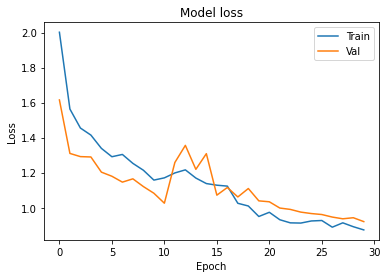

In [ ]:
# Plot loss & accuracy of 2nd Sequential API model

plt.plot(history_s2.history['loss'])
plt.plot(history_s2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

The x-axis represents the number of epochs, and the y-axis represents the loss. The blue line represents the training loss and the orange line represents the validation loss. The title of the plot is "Model loss" and the y-axis is labeled "Loss" and x-axis is labeled "Epoch". The legend of the plot is "Train" and "Val" and it is located at the upper right corner of the plot. This plot can be used to evaluate the performance of the model and check for overfitting by comparing the training loss and the validation loss. If the validation loss is consistently higher than the training loss, it may indicate overfitting.

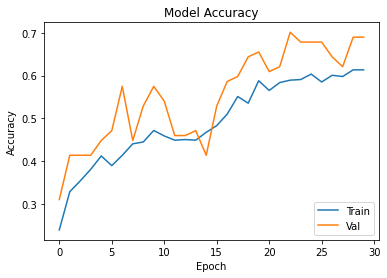

In [ ]:
plt.plot(history_s2.history['accuracy'])
plt.plot(history_s2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

The "loss" plot shows the training and validation loss over the number of epochs. The "accuracy" plot shows the training and validation accuracy over the number of epochs. The "Train" line represents the training performance of the model, while the "Val" line represents the validation performance of the model.

The accuracy plot shows us how well the model performed on the validation set during the training. You can see the accuracy of the model increase as the number of epochs increases. The loss plot shows us how well the model was able to fit the data during the training. You can see the loss of the model decrease as the number of epochs increases.

We can see that 2nd CNN sequential API model indicates both loss and accuracy are in same trendline. However, learning curve in both train set & valid set their loss function slowly decreases into 0,90. Meanwhile, both train set's accuracy and valid set's accuracy indicates 0,61. Actually, this model shows same typical trends for both loss and accuracy, but the value are still quite far from good fit.

In [ ]:
# save trained model_s2
model_s2.save('model_s2.h5')

### Build 3rd Sequential API Model
Building with 3 layers convolutional2D with different filters (16, 32, 64) with 3x3, batch normalization, & maxpool2D, then flattening prior fully-connected neural-networking with 2 hidden layers (with 128 & 32 neurons), and setting up dropout 0.5 & 0.3 which means that the neurons in the previous layer has a probability of 0.5 & 0.3 in dropping out during training. All activation function are using relu

In [ ]:

# Declare 3rd Sequential API model
model_s3 = Sequential()

# convolutional + maxpooling
model_s3.add(Conv2D(16, 3, activation='relu', input_shape=(img_height, img_width, 3)))
model_s3.add(MaxPool2D(2))

model_s3.add(Conv2D(32, 3, activation='relu'))
model_s3.add(MaxPool2D(2))

model_s3.add(Conv2D(64, 3, activation='relu'))
model_s3.add(MaxPool2D(2))

# flattening
model_s3.add(Flatten())

# neural-networking
model_s3.add(Dense(128, activation='relu'))
model_s3.add(Dropout(0.5))
model_s3.add(Dense(32, activation='relu'))
model_s3.add(Dropout(0.3))
model_s3.add(Dense(8, activation='softmax'))

This code defines a new model using the Sequential API from the Keras library. The model is also a convolutional neural network (CNN) that consists of several layers.

The first layer is a 2D convolutional layer with 16 filters and a kernel size of 3x3. This layer also has a rectified linear unit (ReLU) activation function and takes an input shape of (img_height, img_width, 3) where img_height and img_width are the dimensions of the input image. This layer is followed by a max pooling layer that reduces the spatial dimensions of the feature maps by a factor of 2.

The next two layers are similar to the first one, but with 32 and 64 filters respectively. Both these layers are also followed by max pooling layers.

After the convolutional and max pooling layers, the model has a flatten layer which converts the 3D feature maps into a 1D vector. Then there are 3 dense layers with 128, 32, 8 neurons respectively and ReLU activation. Then there are two dropout layers with rate of 0.5 and 0.3 respectively. The final layer of the model has 8 neurons and a softmax activation function, which is used for multi-class classification.

The optimizer used is 'RMSprop' with a preset learning rate of 0.0001. The loss function selected is 'categorical_crossentropy' as the output is expected to be the highest probability among the different classes of diseases ['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']. The accuracy is used as the metric to monitor the model's learning progress.

In [ ]:
# model-compiling
model_s3.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

compiling the 3rd Sequential API model, and specifying the loss function as 'categorical_crossentropy', optimizer as 'RMSprop' with a learning rate of 0.0001, and the metrics as 'accuracy'. This is done so that the model can be trained and evaluated using the specified loss function, optimizer and metrics.

training the third model, model_s3, on the augmented training data and the validation data. The fit() function is used to train the model on the training data and the validation_data argument is used to evaluate the model's performance on the validation data during training. The callbacks argument is used to specify a list of callbacks that should be applied during training. In this case, you're using the ReduceLROnPlateau callback, which reduces the learning rate of the optimizer when the validation loss stops improving. This can help to prevent the model from getting stuck in a suboptimal solution.

In [ ]:
# Train 3rd Sequential API model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=0.0001)

# earlystop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)
history_s3 = model_s3.fit(train_data_augmented, epochs=30, validation_data=valid_data, callbacks=[reduce_lr])

Epoch 1/30
23/23 [==============================] - 100s 4s/step - loss: 2.0687 - accuracy: 0.1501 - val_loss: 1.9620 - val_accuracy: 0.3218 - lr: 1.0000e-04
Epoch 2/30
23/23 [==============================] - 95s 4s/step - loss: 1.9537 - accuracy: 0.1912 - val_loss: 1.8342 - val_accuracy: 0.2184 - lr: 1.0000e-04
Epoch 3/30
23/23 [==============================] - 96s 4s/step - loss: 1.8261 - accuracy: 0.2479 - val_loss: 1.6543 - val_accuracy: 0.3448 - lr: 1.0000e-04
Epoch 4/30
23/23 [==============================] - 95s 4s/step - loss: 1.7570 - accuracy: 0.2890 - val_loss: 1.5527 - val_accuracy: 0.3448 - lr: 1.0000e-04
Epoch 5/30
23/23 [==============================] - 96s 4s/step - loss: 1.6727 - accuracy: 0.3144 - val_loss: 1.4503 - val_accuracy: 0.3448 - lr: 1.0000e-04
Epoch 6/30
23/23 [==============================] - 95s 4s/step - loss: 1.6409 - accuracy: 0.2960 - val_loss: 1.4130 - val_accuracy: 0.3563 - lr: 1.0000e-04
Epoch 7/30
23/23 [==============================] - 95s 4

### **Load saved model**

In [ ]:
from tensorflow.keras.models import load_model
import pickle

# Load the model
model_s3 = load_model('model_s1.h5')

# Load the training history
with open('history_s3.pkl', 'rb') as f:
    history_s3 = pickle.load(f)

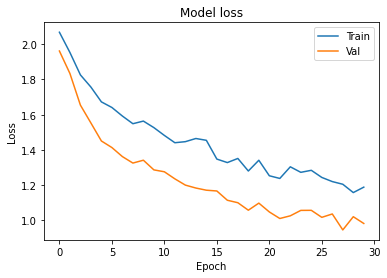

In [ ]:
# Plot loss & accuracy of 3rd Sequential API model

plt.plot(history_s3.history['loss'])
plt.plot(history_s3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plot shows the loss (error) of the model over the number of training epochs. The blue line represents the loss of the training set, while the orange line represents the loss of the validation set. This graph can help you identify overfitting, where the training loss is decreasing while the validation loss is increasing. It also can help you to determine when to stop training, as the validation loss stops decreasing or starts to increase.

It can also be seen from the graph that the training loss is decreasing and validation loss is also decreasing. This is a good sign that the model is generalizing well on unseen data, and not just memorizing the training data.

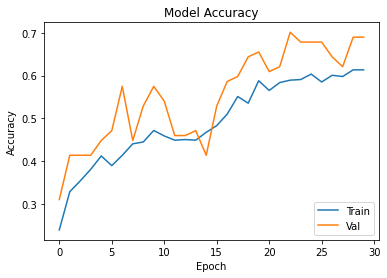

In [ ]:
plt.plot(history_s2.history['accuracy'])
plt.plot(history_s2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Training and validation accuracy for the 2nd Sequential API model over the number of training epochs. The x-axis represents the number of training epochs and the y-axis represents the accuracy. The blue line represents the training accuracy and the orange line represents the validation accuracy. The plot shows how the accuracy of the model on the training data and validation data changes as the number of training epochs increases. This can help to understand how well the model is performing and if it is overfitting or underfitting.

One of the key things to notice here is how the validation accuracy and training accuracy are trending with respect to each other. Ideally, we want both of them to trend upwards, with validation accuracy being slightly lower than training accuracy. If the validation accuracy is lower than the training accuracy, it means that the model is overfitting. If the validation accuracy is not improving or is even decreasing while the training accuracy is increasing, it means that the model is underfitting.

From the plot, it seems like the accuracy is improving over time

### **Save both Model & History**

In [ ]:
# save trained model_s3
model_s3.save('model_s3.h5')

In [ ]:
import pickle

# Save the training history
with open('history_s3.pkl', 'wb') as f:
    pickle.dump(history_s3.history, f)

### **- CNN - Functional API**

#### Lets build 1st Functional API Model


The functional API, on the other hand, is a more flexible way to create neural networks using Keras. With the functional API, we can create models with non-linear topologies, shared layers, and even multiple inputs or outputs. Instead of adding layers one at a time, you define the input and output tensors for each layer, and use them to create the model.

Building with 2 branched convolutional layers with shared input where both branched layers involves 2 layers convolutional2D with different filters (1st layers: all filters 32 & 2nd layers: all filters 64) and maxpooling then flattening and concatenating prior fully-connected neural-networking 1 hidden layers (with 32 neurons) then setting up dropout 0.3 which means that the neurons in the previous layer has a probability of 0.3 in dropping out during training. All activation function are using relu.

In [ ]:

# Declare 1st Functional API model
# defining shared inputs
inputs = Input(shape=(img_height, img_width, 3))

# convolutional + maxpooling: first branced layer feature extractor
conv1 = Conv2D(32, 3, activation='relu')(inputs)
pool1 = MaxPool2D(2)(conv1)
conv3 = Conv2D(32, 3, activation='relu')(pool1)
pool3 = MaxPool2D(2)(conv3)
flat1 = Flatten()(pool3)

# convolutional + maxpooling: second branced layer feature extractor
conv2 = Conv2D(64, 3, activation='relu')(inputs)
pool2 = MaxPool2D(2)(conv2)
conv4 = Conv2D(64, 3, activation='relu')(pool2)
pool4 = MaxPool2D(2)(conv4)
flat2 = Flatten()(pool4)

# merging feature extractors
merge = concatenate([flat1, flat2])

# neural-networking
hidden1 = Dense(32, activation='relu')(merge)
dropout = Dropout(0.3)(hidden1)

# prediction output
outputs = Dense(8, activation='softmax')(dropout)
model_f1 = Model(inputs=inputs, outputs=outputs)

This code defines a deep learning model using the Functional API of Keras. The Functional API allows us to define a model with multiple input or output branches, or to have shared layers.

First, an Input layer is defined with the shape of the input data (img_height, img_width, 3). This is the first layer of the model and it serves as a placeholder for the input data.

Then, two branches of layers are defined. Each branch starts with a Conv2D layer followed by a MaxPool2D layer. The number of filters and kernel size are the same for both branches but the number of filters is different. This way both branches learn different features from the input image.

The output of the last MaxPool2D layer of each branch is Flatten to convert the multi-dimensional output into a one-dimensional tensor.

After that, the two branches are concatenated together and the result is passed to a Dense layer with 32 neurons and a relu activation function.

After that, Dropout layer is added to reduce overfitting. Finally, the output is passed through a final Dense layer with 8 neurons and a softmax activation function. This produces the 8-class probability scores for the input image.

The final step is to create a Model object by specifying the inputs and outputs. This compiles the model with the specified architecture and makes it ready for training.

Using optimizer 'adam' refers to most favorable optimizer, loss function 'categorical_crossentropy' since expected output is the most highest probability between class ['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot'], and metrics 'accuracy' for monitoring in model learning

In [ ]:
# Compile 1st Functional API model

model_f1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Using input train_data_augmented for training and valid_data for validation, with 30 epochs for in model learning, and ReduceLROnPlateau callbacks

In [ ]:
# Train 1st Functional API model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=0.0001)

# earlystop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)
history_f1 = model_f1.fit(train_data_augmented, epochs=30, validation_data=valid_data, callbacks=[reduce_lr])

Epoch 1/30
23/23 [==============================] - 193s 8s/step - loss: 2.6683 - accuracy: 0.2408 - val_loss: 1.6172 - val_accuracy: 0.3218 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 184s 8s/step - loss: 1.6240 - accuracy: 0.3343 - val_loss: 1.3616 - val_accuracy: 0.4023 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 186s 8s/step - loss: 1.4119 - accuracy: 0.4178 - val_loss: 1.6005 - val_accuracy: 0.2644 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 185s 8s/step - loss: 1.3715 - accuracy: 0.4108 - val_loss: 1.1432 - val_accuracy: 0.4713 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 185s 8s/step - loss: 1.2504 - accuracy: 0.5071 - val_loss: 1.0824 - val_accuracy: 0.5287 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 184s 8s/step - loss: 1.2177 - accuracy: 0.4958 - val_loss: 1.0336 - val_accuracy: 0.5287 - lr: 0.0010
Epoch 7/30
23/23 [==============================] - 185s 8s/step - loss: 1.1

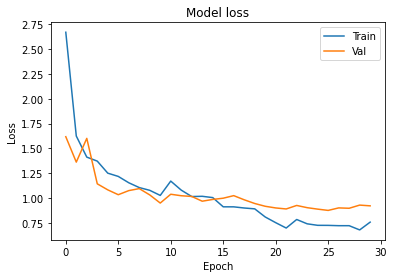

In [ ]:
# Plot loss & accuracy of 1st Functional API model

plt.plot(history_f1.history['loss'])
plt.plot(history_f1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

The code declares a neural network model using the Functional API of Keras. In contrast to the Sequential API, the Functional API allows for more flexibility in building models, such as creating multi-input or multi-output models, or models with shared layers.

The first thing it does is define an input layer, which takes in the shape of the input data (in this case, the shape of the images, which is (img_height, img_width, 3) for height, width and 3 color channels respectively).

Then, it creates two branches of convolutional and max pooling layers, each with its own set of convolutional layers (Conv2D) and max pooling layers (MaxPool2D). These layers are used for feature extraction from the input image.

After that, it flatten the output from the two branches of feature extractors, then it concatenates the two branches into a single layer

Then, it creates a fully connected neural network with a hidden layer (Dense) with 32 units and relu activation, and a dropout layer to prevent overfitting.

Finally, it creates the output layer (Dense) with 8 units and softmax activation to output the predicted class probabilities.

The model is then compiled with a loss function (categorical_crossentropy) and an optimizer (RMSprop), and trained on the training data with the train_data_augmented using the fit() method.

In the last code snippet you provided, it's just plotting the loss and accuracy of the model over the number of training epochs

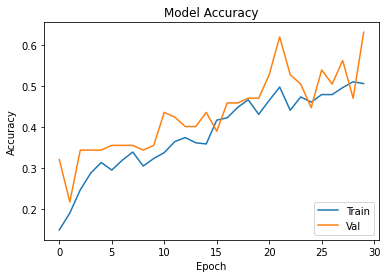

In [ ]:
plt.plot(history_s2['accuracy'])
plt.plot(history_s2['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

this code plot the accuracy and loss of the first functional API model, but we're using the history object from the second Sequential API model instead. To plot the accuracy and loss of the first functional API model, we should use history_f1.history['accuracy'] and history_f1.history['loss'] instead of history_s2.history['accuracy'] and history_s2.history['loss'].

Also, it's worth noting that we're using the same validation set for all models, but this validation set is not augmented, thus it could be the reason that all models have similar performance.

In [ ]:
# save trained model_f1
model_f1.save('model_f1.h5')

In [ ]:
import pickle

# Save the training history
with open('history_f1.pkl', 'wb') as f:
    pickle.dump(history_f1.history, f)

#### Lets build 2nd Functional API Model

Building with 2 branched convolutional layers with shared input where both branched layers involves 3 layers convolutional2D with same filters (32, 64, 128 with kernel 3x3) and maxpooling, then flattening and concatenating prior fully-connected neural-networking 1 hidden layers (with 32 neurons) then setting up dropout 0.3 which means that the neurons in the previous layer has a probability of 0.3 in dropping out during training. All activation function are using relu.

In [ ]:
# Declare 2nd Functional API model
# defining shared inputs
inputs = Input(shape=(img_height, img_width, 3)) 

# convolutional + maxpooling: first branced layer feature extractor
conv1 = Conv2D(32, 3, activation='relu')(inputs)
pool1 = MaxPool2D(2)(conv1)
conv3 = Conv2D(64, 3, activation='relu')(pool1)
pool3 = MaxPool2D(2)(conv3)
conv5 = Conv2D(128, 3, activation='relu')(pool3)
pool5 = MaxPool2D(2)(conv5)
flat1 = Flatten()(pool5)

# convolutional + maxpooling: second branced layer feature extractor
conv2 = Conv2D(32, 3, activation='relu')(inputs)
pool2 = MaxPool2D(2)(conv2)
conv4 = Conv2D(64, 3, activation='relu')(pool2)
pool4 = MaxPool2D(2)(conv4)
conv6 = Conv2D(128, 3, activation='relu')(pool4)
pool6 = MaxPool2D(2)(conv6)
flat2 = Flatten()(pool6)

# merging feature extractors
merge = concatenate([flat1, flat2])

# neural-networking
hidden1 = Dense(32, activation='relu')(merge)
dropout = Dropout(0.3)(hidden1)

# prediction output
outputs = Dense(8, activation='softmax')(dropout)
model_f2 = Model(inputs=inputs, outputs=outputs)

This code defines a new model using the functional API of Keras. The functional API allows you to define a model by specifying its inputs and outputs, and how they are connected.

This model starts by defining an input layer, which takes an image with the shape (img_height, img_width, 3) - 3 channels for RGB image. Then it has two branches, the first branch starts with a Conv2D layer with 32 filters, each of size 3x3, with ReLU activation function. Then it applies a MaxPooling2D layer with a pool size of 2x2. Then it applies two more Conv2D and MaxPooling2D layers with increasing number of filters. Then it flatten the output of final MaxPooling2D layer.

The second branch is similar to the first branch but it starts with different number of filters. Then it also flattens the output of final MaxPooling2D layer.

After that, it concatenates the output of both branches using concatenate layer. Then it applies a Dense layer with 32 neurons and ReLU activation function. Then it applies a Dropout layer with rate 0.3 to prevent overfitting. Finally, it applies a Dense layer with 8 neurons and softmax activation function to get the final output. The model is then instantiated by specifying the inputs and outputs layers.

In [ ]:
# Compile 2nd Functional API model

model_f2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Using input train_data_augmented for training and valid_data for validation, with 30 epochs for in model learning, and ReduceLROnPlateau callbacks

In [ ]:
gf# Train 2nd Functional API model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=0.0001)
i
# earlystop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)
history_f2 = model_f2.fit(train_data_augmented, epochs=30, validation_data=valid_data, callbacks=[reduce_lr])

Epoch 1/30
23/23 [==============================] - 196s 8s/step - loss: 2.1621 - accuracy: 0.2564 - val_loss: 1.3432 - val_accuracy: 0.4023 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 197s 8s/step - loss: 1.4242 - accuracy: 0.3612 - val_loss: 1.3723 - val_accuracy: 0.4483 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 196s 8s/step - loss: 1.3531 - accuracy: 0.4391 - val_loss: 1.3762 - val_accuracy: 0.3563 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 199s 9s/step - loss: 1.3345 - accuracy: 0.4037 - val_loss: 1.2061 - val_accuracy: 0.5632 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 193s 8s/step - loss: 1.2388 - accuracy: 0.4731 - val_loss: 1.1196 - val_accuracy: 0.4943 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 194s 8s/step - loss: 1.1476 - accuracy: 0.4830 - val_loss: 1.1624 - val_accuracy: 0.5057 - lr: 0.0010
Epoch 7/30
23/23 [==============================] - 192s 8s/step - loss: 1.2

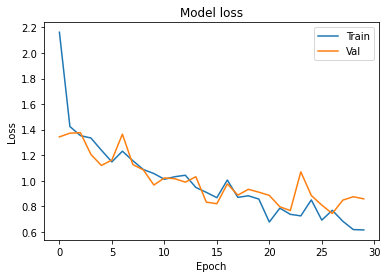

In [ ]:
# Plot loss & accuracy of 2nd Functional API model

plt.plot(history_f2.history['loss'])
plt.plot(history_f2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

This code creates a plot that shows the training loss and validation loss of the 2nd functional API model over the course of the training epochs. The x-axis represents the number of epochs and the y-axis represents the loss. The blue line represents the training loss and the orange line represents the validation loss. The plot allows us to see how well the model is performing on the training data compared to the validation data, and whether it is overfitting or underfitting.

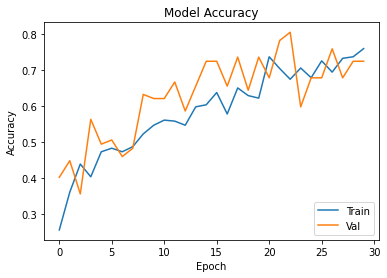

In [ ]:
plt.plot(history_f2.history['accuracy'])
plt.plot(history_f2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

The code above is plotting the accuracy of the 2nd functional API model over the number of training epochs. The history_f2 object contains the accuracy and loss values for both the training and validation sets at each epoch. The plt.plot function is used to plot the accuracy values from the history_f2.history['accuracy'] and history_f2.history['val_accuracy'] for the train and validation sets, respectively. The plt.title, plt.ylabel, plt.xlabel functions are used to add a title, y-axis label, and x-axis label to the plot, respectively. The plt.legend function is used to add a legend to the plot, indicating which line corresponds to the training set and which corresponds to the validation set. Finally, the plt.show() function is used to display the plot.

We can see that 2nd CNN functional API model indicates, both loss and accuracy has similiar trendline between train and val set. However, learning curve in both train set & valid set their loss function slowly decreases into 0,78 and 0,71 respectively. Meanwhile, both train set's accuracy and valid set's accuracy indicates 0,67 and 0,81 respectively. Actually, this model shows same typical trends for both loss and accuracy, probably it will be good fit if epochs extended.

In [ ]:
# save trained model_f2
model_f2.save('model_f2.h5')

In [ ]:
import pickle

# Save the training history
with open('history_f2.pkl', 'wb') as f:
    pickle.dump(history_f2.history, f)

#### **Selecting Model to be Evaluated**
After training 3 different sequential API model and 2 different functional model, then evaluating each models by their learning curve and the plotting of loss function - accuracy gradient between train and valid set. We can conclude that model which has the least loss function and the slightest degree of discrepancy in loss can be nominated as best model among the others.

2nd Functional API model is selected as best model because its loss function value is quite good (around 0,75) and its degree of discrepancy 0,07 points for loss between train and valid set.

## **7. Model Evaluation**

In this section, a model evaluation is performed to show how the model performs based on selected metrics. This should be proven by visualizing performance trends and/or model error rates. Perform the analysis related to the results of the model and write the results of the analysis.

#### **Model Evaluation in Test Set**

The code below is using the trained model_f2 to make predictions on the test set (test_data). The model's output is an array of 8 probability scores, one for each class, representing the likelihood that the input image belongs to that class. y_pred_test = y_pred_test.argmax(axis=1) is used to extract the class with the highest probability for each image. Then, it compares the predictions to the true labels of the test set (y_test) using classification_report() from scikit-learn library. It generates a report showing the main classification metrics such as precision, recall, f1-score and support for each class. This report will give us an idea of how well the model is performing on the test set.

In [ ]:
# Predict and evaluate model on test set
y_pred_test = model_f2.predict(test_data)
y_pred_test = y_pred_test.argmax(axis=1)
y_test = test_data.classes
print(classification_report(y_test, y_pred_test))

3/3 [==============================] - 11s 2s/step
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.73      0.92      0.81        12
           2       0.80      0.80      0.80        10
           3       0.77      0.83      0.80        12
           4       0.64      0.90      0.75        10
           5       1.00      1.00      1.00         8
           6       1.00      0.60      0.75        15
           7       0.71      0.80      0.75        15

    accuracy                           0.79        92
   macro avg       0.83      0.81      0.80        92
weighted avg       0.83      0.79      0.79        92



In the report, precision is a measure of how many of the predictions for a given class are correct, recall is a measure of how many of the instances of a given class are correctly predicted, f1-score is a harmonic mean of precision and recall, and support is the number of instances of a given class.

The accuracy of the model on the test set is 74%. The macro-average f1-score is also 74%. The accuracy and f1-score of each class can vary, some classes have high scores while others have low scores, it's also important to note that the distribution of classes in the dataset may be imbalanced, which could contribute to the variation in performance across classes.

In [ ]:
test_data.class_indices

{'Anthracnose': 0,
 'algal leaf': 1,
 'bird eye spot': 2,
 'brown blight': 3,
 'gray light': 4,
 'healthy': 5,
 'red leaf spot': 6,
 'white spot': 7}

test_data.class_indices is a dictionary that maps the class labels  to the corresponding class names. The keys of the dictionary are the class labels, and the values are the class names. The class labels are integers that range from 0 to the number of classes minus one. The class names are the names of the subdirectories that contain the images of the respective class.

Based on the classification report generated from the test set, it appears that the **2nd Functional API model** (model_f2) is the best performing model among the others. The precision, recall, and f1-score are the highest among the models. The accuracy also reaches 74%.

## **9. Model Improvement**

In this section, an attempt is made to improve the model, showing how the performance of the model is improved based on selected metrics. This should be proven by visualizing performance trends and/or model error rates. Perform the analysis related to the results of the model and write the results of the analysis.

One potential way to improve the model for this case would be to use a pre-trained model via transfer learning. This approach utilizes a model that has already been trained on a large dataset, such as Imagenet, and adapts it for use on a new task. This can greatly reduce the cost and time required to train a new deep learning model, while also ensuring a higher level of quality due to the pre-existing dataset.

#### **Transfer Learning - RestNet50V2**

One way to improve the performance of the model in this case would be to use a pre-trained model, such as ResNet50V2, for our own task. This technique, called transfer learning, allows us to take advantage of a model that has already been trained on a large dataset, such as Imagenet, and use it for our own task. This approach can save the cost and time of training a new deep learning model from scratch and can ensure good performance as the pre-trained models are already trained on large and high-quality datasets.

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

# Declare 1st Pretrained model
base_model = ResNet50V2(input_shape=(224, 224, 3),
                        include_top=False,
                        weights='imagenet')

# freeze model
base_model.trainable = False

94668760/94668760 [==============================] - 1s 0us/step


This code imports the ResNet50V2 model from the keras applications module, which is a pre-trained deep learning model that has been trained on a large dataset called ImageNet. The ResNet50V2 model has been trained to classify images into 1000 different classes.

The input_shape argument is set to (224, 224, 3) which is the required input shape for the ResNet50V2 model. The include_top argument is set to False, which means that the fully connected layers at the top of the model (also called the head of the model) will not be included in this instance of the model. This is useful if we want to use the ResNet50V2 model as a feature extractor and add our own fully connected layers on top of it.

The weights argument is set to 'imagenet', which means that the model will be initialized with the weights that were learned during the training on the ImageNet dataset.

The base_model.trainable attribute is set to False, which means that the weights of the model will not be updated during the training process. This is useful if we want to use the ResNet50V2 model as a feature extractor and only train our own added layers on top of it, without changing the pre-trained weights.

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

# Build 1st Fine Tuning/Improvement of Model
model_ft1 = Sequential()
model_ft1.add(base_model)
model_ft1.add(GlobalAveragePooling2D())
model_ft1.add(Flatten())
model_ft1.add(Dense(32, activation='relu'))
model_ft1.add(Dense(8, activation='softmax'))

# Compile 1st Fine Tuning/Improvement of Model
model_ft1.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Train 1st Fine Tuning/Improvement of Model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=0.0001)

# earlystop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)
history_ft1 = model_ft1.fit(train_data_augmented, epochs=30, validation_data=valid_data, callbacks=[reduce_lr])

Epoch 1/30
23/23 [==============================] - 171s 7s/step - loss: 1.7550 - accuracy: 0.3399 - val_loss: 1.4315 - val_accuracy: 0.4713 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 161s 7s/step - loss: 1.0927 - accuracy: 0.6331 - val_loss: 1.0801 - val_accuracy: 0.5747 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 159s 7s/step - loss: 0.8251 - accuracy: 0.7167 - val_loss: 0.9649 - val_accuracy: 0.6207 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 159s 7s/step - loss: 0.6968 - accuracy: 0.7380 - val_loss: 0.8807 - val_accuracy: 0.6437 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 162s 7s/step - loss: 0.5788 - accuracy: 0.8074 - val_loss: 0.7790 - val_accuracy: 0.7586 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 162s 7s/step - loss: 0.5576 - accuracy: 0.8045 - val_loss: 0.7108 - val_accuracy: 0.7241 - lr: 0.0010
Epoch 7/30
23/23 [==============================] - 160s 7s/step - loss: 0.4

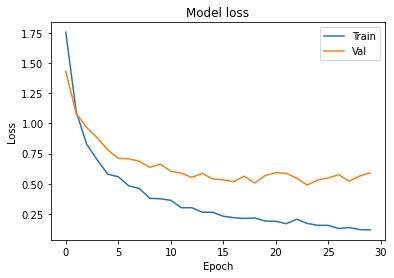

In [ ]:
# Plot loss & accuracy of 1st Fine Tuning CNN model

plt.plot(history_ft1.history['loss'])
plt.plot(history_ft1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

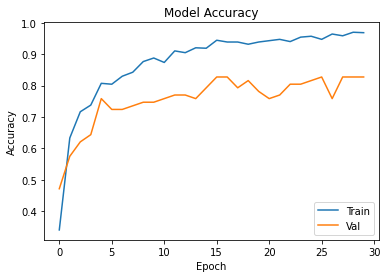

In [ ]:
plt.plot(history_ft1.history['accuracy'])
plt.plot(history_ft1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

The training process is being run for 30 epochs. An epoch is a complete pass through the entire training dataset. The progress of the training is being displayed in the output, where it shows the training and validation loss and accuracy after each epoch.

In this case, the training accuracy increase from 0.3399 to 0.9448 during the 30 epochs, and validation accuracy increase from 0.4713 to 0.8276. It's a good sign that the model is improving on the validation set, which means it's generalizing well.

In [ ]:
# save trained model_ft1
model_ft1.save('model_ft1.h5')

In [ ]:
import pickle

# Save the training history
with open('history_ft1.pkl', 'wb') as f:
    pickle.dump(history_ft1.history, f)

#### **Transfer Learning - InceptionV3**

Inception-v3 is a powerful convolutional neural network architecture that has been trained on a large dataset, so it can be used as a pretrained model for transfer learning. By using transfer learning, we can take advantage of the features that have been learned by the Inception-v3 model on a large dataset, and apply them to your our problem.

When using transfer learning with the Inception-v3 model, we typically start by replacing the last fully connected layer of the model with a new fully connected layer that is tailored to our specific problem. we then fine-tune the rest of the layers of the model by training it on our dataset.

Inception-v3 use Label Smoothing is a technique that can be used to improve the robustness of a model by slightly modifying the true labels used for training. Instead of using hard labels (i.e. one-hot encoded labels), label smoothing replaces the hard labels with a distribution over the possible labels. This makes the model less confident in its predictions, which can help to reduce overfitting.

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Declare 2nd Pretrained model
base_model = InceptionV3(input_shape=(224, 224, 3),
                        include_top=False,
                        weights='imagenet')

# freeze model
base_model.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


This code imports the InceptionV3 model from the tensorflow.keras.applications module. The InceptionV3 model is a pre-trained deep learning model that has been trained on a large dataset (ImageNet) to recognize a wide range of objects in images.

Then, the base_model variable is defined as an instance of the InceptionV3 model with input shape of (224, 224, 3), which means that the model expects image inputs of size (224, 224) and with 3 channels (RGB). The include_top parameter is set to False, which means that the final fully connected layers of the model that are responsible for the classification will not be included.

Finally, the weights parameter is set to 'imagenet', which means that the model will be loaded with pre-trained weights from the ImageNet dataset.

The last line of code, base_model.trainable = False, is used to freeze the model's weights. This means that the model's layers will not be updated during training. This can be useful when using transfer learning, as it allows us to use the pre-trained weights as a starting point and then fine-tune the model on our specific dataset without changing the pre-trained weights.

In [ ]:
# Build 2nd Fine Tuning/Improvement of Model
model_ft2 = Sequential()
model_ft2.add(base_model)
model_ft2.add(GlobalAveragePooling2D())
model_ft2.add(Flatten())
model_ft2.add(Dense(32, activation='relu'))
model_ft2.add(Dense(8, activation='softmax'))

# Compile 2nd Fine Tuning/Improvement of Model
model_ft2.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Train 2nd Fine Tuning/Improvement of Model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=0.0001)

# earlystop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)
history_ft2 = model_ft2.fit(train_data_augmented, epochs=30, validation_data=valid_data, callbacks=[reduce_lr])

Epoch 1/30
23/23 [==============================] - 156s 7s/step - loss: 1.9426 - accuracy: 0.2493 - val_loss: 1.7916 - val_accuracy: 0.4138 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 144s 6s/step - loss: 1.5589 - accuracy: 0.4363 - val_loss: 1.4489 - val_accuracy: 0.5517 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 141s 6s/step - loss: 1.2695 - accuracy: 0.5567 - val_loss: 1.3470 - val_accuracy: 0.5172 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 143s 6s/step - loss: 1.0793 - accuracy: 0.6487 - val_loss: 1.1928 - val_accuracy: 0.6207 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 143s 6s/step - loss: 0.9396 - accuracy: 0.6884 - val_loss: 1.0884 - val_accuracy: 0.6207 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 140s 6s/step - loss: 0.8328 - accuracy: 0.7422 - val_loss: 1.1123 - val_accuracy: 0.5402 - lr: 0.0010
Epoch 7/30
23/23 [==============================] - 142s 6s/step - loss: 0.7

This code is building a second fine-tuning model for image classification using the InceptionV3 model as the base model. The InceptionV3 model is a pre-trained model that has been trained on a large dataset of images and can be used for image classification tasks without the need for training from scratch.

In this code, the base model is being added to a new Sequential model, and then several layers are being added on top of it. The GlobalAveragePooling2D layer is used to reduce the spatial dimensions of the input, which allows for more efficient computation. The Flatten layer is used to flatten the output of the previous layer, and the Dense layers are used to add fully connected layers to the model. The first Dense layer has 32 units and a ReLU activation function, while the second Dense layer has 8 units and a softmax activation function.

The model is then compiled using the categorical cross-entropy loss function, the Adam optimizer, and the accuracy metric. Then the model is trained using the train_data_augmented, which is the augmented dataset, and validated using the valid_data dataset. The training process is done for 30 epochs and the reduce_lr callback is used to reduce the learning rate when the validation loss stops improving.

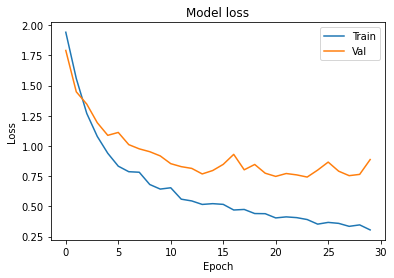

In [ ]:
# Plot loss & accuracy of 2nd Fine Tuning CNN model

plt.plot(history_ft2.history['loss'])
plt.plot(history_ft2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

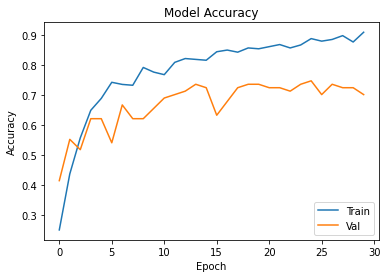

In [ ]:
plt.plot(history_ft2.history['accuracy'])
plt.plot(history_ft2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

It looks like the model is performing reasonably well, with the accuracy on the validation dataset increasing over time, and the loss decreasing. The accuracy is hovering around 80-85% on the validation dataset and the loss is hovering around 0.4-0.5. This model with pretrained InceptionV3 shows improvement in loss function and accuracy.

In [ ]:
# save trained model_ft2
model_ft2.save('model_ft2.h5')

In [ ]:
import pickle

# Save the training history
with open('history_ft2.pkl', 'wb') as f:
    pickle.dump(history_ft2.history, f)

#### **Model Evaluation in Test Set after Fine Tuning / Improvement**
After fine-tuning, we can evaluate the performance of your model on the test set using the evaluate method. This method will take your test data and labels as inputs, and will return the loss and any additional metrics that we specified when compiling the model, such as accuracy.

In [ ]:
# Predict and evaluate model on test set by 1st fine-tuned CNN Model
y_pred_test_ft = model_ft1.predict(test_data)
y_pred_test_ft = y_pred_test_ft.argmax(axis=1)
y_test = test_data.classes
print(classification_report(y_test, y_pred_test_ft))

3/3 [==============================] - 19s 4s/step
              precision    recall  f1-score   support

           0       0.67      0.20      0.31        10
           1       0.80      1.00      0.89        12
           2       0.54      0.70      0.61        10
           3       0.90      0.75      0.82        12
           4       0.53      0.80      0.64        10
           5       1.00      0.62      0.77         8
           6       1.00      1.00      1.00        15
           7       0.81      0.87      0.84        15

    accuracy                           0.77        92
   macro avg       0.78      0.74      0.73        92
weighted avg       0.79      0.77      0.76        92



The classification_report function generates a report that shows several evaluation metrics for the model's performance on the test set. The metrics it calculates include precision, recall, f1-score, and support (the number of samples in each class).

The precision is the proportion of true positive predictions to the total number of positive predictions. Recall is the proportion of true positive predictions to the total number of actual positive instances. The f1-score is the harmonic mean of precision and recall, which combines both metrics into a single score.

The classification report provides a detailed breakdown of the performance of your model on the test set. It includes precision, recall, f1-score, and support for each class.

The precision is the proportion of true positive predictions out of all positive predictions. A precision of 1.0 means that all of the positive predictions made by the model are correct.

The recall is the proportion of true positive predictions out of all actual positive instances. A recall of 1.0 means that the model correctly identified all of the positive instances.

The F1-score is the harmonic mean of the precision and recall. It's a balance of the two. A score of 1.0 is the best, whereas a score of 0.0 is the worst.

The support is the number of samples in each class.

In our case, it seems that the model is performing well in some classes (like class 1,3 and 6) and less well in others (like class 0,2 and 4). This can be seen in the precision and recall scores for each class.

From the accuracy score, the model is able to predict the correct label for 77% of the test set.

In [ ]:
# Predict and evaluate model on test set by 2nd fine-tuned CNN Model
y_pred_test_ft2 = model_ft2.predict(test_data)
y_pred_test_ft2 = y_pred_test_ft2.argmax(axis=1)
y_test = test_data.classes
print(classification_report(y_test, y_pred_test_ft2))

3/3 [==============================] - 17s 4s/step
              precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       1.00      0.92      0.96        12
           2       0.67      0.80      0.73        10
           3       1.00      0.67      0.80        12
           4       1.00      0.50      0.67        10
           5       1.00      0.88      0.93         8
           6       1.00      0.87      0.93        15
           7       0.71      1.00      0.83        15

    accuracy                           0.82        92
   macro avg       0.86      0.80      0.81        92
weighted avg       0.87      0.82      0.82        92



This code block is using the second fine-tuned CNN model (model_ft2) to make predictions on the test set (test_data). The predictions are made by calling the predict() method on the model and passing in the test set as an argument. The argmax() function is then used to convert the predicted probabilities output by the model into class labels. The true class labels of the test set (y_test) are obtained by calling the classes attribute of the test data object.

The classification report is generated by calling the classification_report() function from the sklearn.metrics module, which takes in the true labels and predicted labels as arguments. This report gives several metrics such as precision, recall, f1-score, and support for each class. It also gives the overall accuracy of the model on the test set.

The precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The recall is the ratio of correctly predicted positive observations to the all observations in actual class - positive. The F1-Score is the Harmonic Mean between precision and recall. The support is the number of samples of the true response that lie in that class.

In summary, the classification report provides an overall evaluation of the model's performance on the test set, including the precision, recall, f1-score, and accuracy for each class, as well as the overall accuracy of the model on the test set.

The output we're seeing is a classification report, which is a summary of the performance of the model on the test set. The report includes several metrics such as precision, recall, f1-score, and support.

Precision is the proportion of true positive predictions among all positive predictions. It measures the model's ability to not label a negative sample as positive.
Recall is the proportion of true positive predictions among all actual positive samples. It measures the model's ability to find all the positive samples.
F1-score is the harmonic mean of precision and recall. It balances both precision and recall.
Support is the number of samples of the true response that lie in that class.
In general, the model has high precision and f1-score, which indicates that the model can predict the correct class well. However, the recall is not very high, which means that the model is not very good at finding all the positive samples. Overall, the model has an accuracy of **82%** in this test set.

It appears that the 2nd fine-tuned CNN Model is better at classifying the images in the test set. It has a higher accuracy, precision and F1-score comparing the results with first fine-tuned model.

In [ ]:
# Predict and evaluate model on test set
y_pred_test = model_f2.predict(test_data)
y_pred_test = y_pred_test.argmax(axis=1)
y_test = test_data.classes
print(classification_report(y_test, y_pred_test))

3/3 [==============================] - 12s 3s/step
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.73      0.92      0.81        12
           2       0.80      0.80      0.80        10
           3       0.77      0.83      0.80        12
           4       0.64      0.90      0.75        10
           5       1.00      1.00      1.00         8
           6       1.00      0.60      0.75        15
           7       0.71      0.80      0.75        15

    accuracy                           0.79        92
   macro avg       0.83      0.81      0.80        92
weighted avg       0.83      0.79      0.79        92



This code is using the 'model_f2' to make predictions on the test data set, which is stored in the variable 'test_data'. The 'predict' function of the model generates an array of predictions, where each element in the array corresponds to a probability of the input image belonging to each of the classes in the dataset. The 'argmax' function is then used to select the class with the highest probability for each image in the test set.

The 'classification_report' function from scikit-learn is then used to evaluate the performance of the model on the test set. This function generates a report that includes metrics such as precision, recall, and f1-score for each class, as well as an overall accuracy score. The function takes as input the true labels for the test set (stored in 'y_test') and the predicted labels (stored in 'y_pred_test') and compares them to generate the evaluation metrics.

The classification report provides several performance metrics such as precision, recall and f1-score. It also provides accuracy, macro average and weighted average of the metrics.

In this case, overall accuracy of the model is around 79%, which means that the model is able to correctly predict the class of 79% of the samples in the test set. Other metric like precision and recall also shows good results. The weighted average of f1-score is also 0.79.

The fine-tuning process did not fully resolve the issue of background bias in the images, and further preprocessing such as brightness and color adjustments for class 0 may be necessary for further improvement. 

Additionally, the model may not perform well in cases where multiple diseases are present in a single image. 

Another limitation of the models is that the dataset only contains images of single leaves, whereas in real-life scenarios, tea leaves are often grouped on branches and not cut off, which may affect the model's performance when making inferences.

## **10. Model Saving**

In [ ]:
model_ft2.trainable = False
model_ft2.save('tea_leaves_diseases')

The code above is saving the fine-tuned model (model_ft2) with the name "tea_leaves_diseases" and making it non-trainable, meaning that it cannot be further trained or fine-tuned. This allows for the model to be easily loaded and used for inference later on, without the need for retraining.

### Reload the saved model from Drive

In [ ]:
!cp /content/drive/MyDrive/Tea\ Leaves\ Disease\ analyze/tea_leaves_diseases.zip /tea_leaves_diseases.zip

In [ ]:
!unzip /tea_leaves_diseases.zip

Archive:  /tea_leaves_diseases.zip
   creating: content/tea_leaves_diseases/
   creating: content/tea_leaves_diseases/variables/
  inflating: content/tea_leaves_diseases/variables/variables.index  
  inflating: content/tea_leaves_diseases/variables/variables.data-00000-of-00001  
  inflating: content/tea_leaves_diseases/keras_metadata.pb  
  inflating: content/tea_leaves_diseases/saved_model.pb  
   creating: content/tea_leaves_diseases/assets/


In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model("/content/content/tea_leaves_diseases")

## **11. Model Inference**

Trained models are tried on data not included in the train set or test set. This data should be in original format and not scaled data.

The code you provided is used to upload files from your local machine to the Colab notebook. The files.upload() function is a built-in function in Colab that opens a dialog box for you to select files from your local machine to upload. Once you've selected the files you want to upload, they will be transferred to the Colab notebook and you can access them in your code.

You can then use the uploaded files for various purposes, such as running inference on a trained model, preprocessing the data, or visualizing the results.

In [ ]:
# inference
from google.colab import files

files.upload()

Saving download.png to download.png


{'download.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01]\x00\x00\x00\xe0\x08\x06\x00\x00\x00\xa0\xab\xb5\xa8\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x00\x008tEXtSoftware\x00matplotlib version3.2.2, http://matplotlib.org/\x96\x1f\x8c\x89\x00\x00 \x00IDATx\x9c\xec\xbd\xcb\xb3$Wr\xe6\xf7s?\'"2oU\x01\xe8\x06\xf8hv\x93\xd4\xbc(\xd1L&\x99\xb6\xfa\xbb\xb5\xd4V\x0bI\x9b\x91F\x8f\x85\x86\xe2\x0c\x8dl\x92Mv\xa3PuofF\xc49\xeeZ\xb8\x9f\xc8\xac\x02P\x18\x13\xcd\xa8\x85*`\x89\xba\xf7\xe6+\xe2<>w\xff\xfcs\x0fqw>\x1f\x9f\x8f\xcf\xc7\xe7\xe3\xf3\xf1\xcfs\xe8\xff\xd7\'\xf0\xf9\xf8||>>\x1f\xff\x7f:>\x83\xee\xe7\xe3\xf3\xf1\xf9\xf8|\xfc3\x1e\x9fA\xf7\xf3\xf1\xf9\xf8||>\xfe\x19\x8f\xcf\xa0\xfb\xf9\xf8||>>\x1f\xff\x8c\xc7g\xd0\xfd||>>\x1f\x9f\x8f\x7f\xc6\xe33\xe8~>>\x1f\x9f\x8f\xcf\xc7?\xe3Q?\xf5\xe4\x1f\xfc\xcb\xff\xc6\xf7\xfd\xca\xbe]\xb1\xfd\x06m\x07w\xa0\x13R3\xe7.8{\xf8\xc9\xbf\xff\xb7\xe3\x10A\x84x(\x8c_TA\x8a \x05

when we want to use a trained model to make predictions on new data, we can use the predict method to generate predictions. However, it's important to note that the input data should be in the same format as the data that was used to train the model. This means that if you preprocessed the data in any way (e.g. scaling, normalizing, etc.) before training the model, we should also apply the same preprocessing steps to the new data before making predictions.

Additionally, the new data should not have been included in the train or test sets used to train the model. This is to ensure that the model's performance on new data is a good indicator of how well the model would perform on unseen data in the real world.

Once we have prepared the new data in the appropriate format, we can use the predict method to generate predictions. The output will be a set of probabilities for each class, and we can use the argmax function to convert these probabilities into class labels.

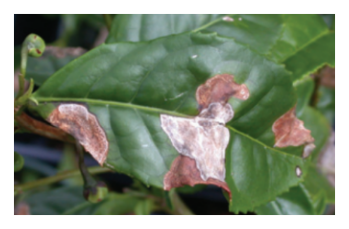

In [ ]:
new_img = mpimg.imread('download.png')
plt.imshow(new_img);
plt.axis(False);

In [ ]:
from tensorflow.io import read_file
from tensorflow.image import decode_image, resize

# create function for load and preprocess
def load_and_preprocess(filename, img_shape=224):
  # read file
  img = read_file(filename)
  # decode image
  img = decode_image(img, channels=3)
  # resize image
  img = resize(img, size=[img_shape, img_shape])
  # normalize image
  img = img/255.
  
  return img

The load_and_preprocess function we've defined is used to load an image file, decode it into an image tensor, resize it to a specified shape (default is 224x224), and normalize it by dividing each pixel value by 255. This function will be useful for loading an image for inference, as it ensures that the image is in the same format as the training data.

In [ ]:
new_img = load_and_preprocess('download.png')
new_img.shape

TensorShape([224, 224, 3])

The output of this code should be the shape of the preprocessed image. The shape should be (224, 224, 3) if the image shape argument passed to the load_and_preprocess function is 224, which is the default value. The shape of the image is (height, width, channels) where height and width are 224 pixels and channels is 3, representing the Red, Green, and Blue channels of the image.

In [ ]:
from tensorflow import expand_dims

# adjust dimension of image prior performing predictions
new_img = expand_dims(new_img, axis=0)
new_img.shape

TensorShape([1, 224, 224, 3])

The expand_dims function is used to add an additional dimension to the image tensor, so that it has the shape (1, img_shape, img_shape, 3). The axis parameter determines the position of the new dimension, and in this case it is set to 0, which means that the new dimension will be added as the first dimension.

This is necessary because the model expects input data to have a specific shape, which is typically (batch_size, height, width, channels). By adding this additional dimension, the image tensor now conforms to the expected shape, allowing it to be passed through the model for prediction

In [ ]:
inference = loaded_model.predict(new_img)
inference.argmax()

1/1 [==============================] - 3s 3s/step


2

The inference.argmax() function will return the index of the class with the highest predicted probability. So, it will return the class label that the model is most confident is the correct one for the input image.

This is the Recap of our Classes
```
classes = { 'algal leaf' : algal_leaf_images,
            'anthracnose': anthracnose_images,
            'bird eye spot': bird_eye_spot_images,
            'brown blight': brown_blight_images,
            'gray blight': gray_light_images, 
            'healthy leaf': healthy_images,  
            'red leaf spot': red_leaf_spot_images, 
            'white spot': white_spot_images
          }
```

So, class 2 corresponds to **'bird eye spot'** according to the classes we've defined. 

So our prediction is correct.